In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from scipy import stats


In [4]:
df_wine = pd.read_csv('wine-quality/wine_quality_combined.csv')
df_red = pd.read_csv('wine-quality/wine_quality_red.csv')
df_white = pd.read_csv('wine-quality/wine_quality_white.csv')

In [5]:
(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium


In [6]:
df_low=df_wine[df_wine['quality_label'] == 'low']
df_low=df_low[df_low.columns[:-3]]
df_medium=df_wine[df_wine['quality_label'] == 'medium']
df_medium=df_medium[df_medium.columns[:-3]]
df_high=df_wine[df_wine['quality_label'] == 'high']
df_high=df_high[df_high.columns[:-3]]

In [7]:
desc_stats = []
for df in [df_low,df_medium,df_high]:
    desc_stats.append(df.describe())

In [8]:
for df in [df_low,df_medium,df_high]:
    display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,7.329992,0.397410,0.304178,5.646225,0.064404,29.480495,119.277055,0.995756,3.214522,0.524270,9.873544
std,1.268400,0.187971,0.162936,4.917239,0.042812,19.844383,61.887639,0.002464,0.161311,0.143764,0.841746
min,4.200000,0.100000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987220,2.740000,0.250000,8.000000
25%,6.500000,0.260000,0.210000,1.800000,0.043000,14.000000,68.000000,0.993960,3.110000,0.440000,9.300000
50%,7.100000,0.337500,0.295000,2.900000,0.052000,26.000000,124.000000,0.996000,3.200000,0.500000,9.600000
75%,7.800000,0.500000,0.400000,8.525000,0.077000,42.000000,167.000000,0.997540,3.310000,0.580000,10.400000
max,15.900000,1.580000,1.000000,23.500000,0.611000,289.000000,440.000000,1.003150,3.900000,2.000000,14.900000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000
mean,7.163946,0.306955,0.326664,5.324291,0.051709,30.960281,113.505747,0.994164,3.220577,0.536539,10.807612
std,1.313999,0.139826,0.134743,4.683706,0.028906,16.332851,53.572899,0.003098,0.160674,0.150758,1.201098
min,3.800000,0.080000,0.000000,0.700000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000
25%,6.400000,0.210000,0.260000,1.800000,0.036000,19.000000,81.000000,0.991680,3.110000,0.430000,9.800000
50%,6.900000,0.270000,0.310000,3.000000,0.045000,29.000000,116.000000,0.994000,3.210000,0.510000,10.800000
75%,7.600000,0.360000,0.390000,7.900000,0.058000,41.000000,150.000000,0.996500,3.330000,0.610000,11.700000
max,15.600000,1.040000,1.660000,65.800000,0.415000,112.000000,294.000000,1.038980,4.010000,1.950000,14.200000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,6.850000,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414
std,1.144918,0.118123,0.102157,4.161541,0.015679,17.084070,41.693584,0.002883,0.156431,0.164466,1.273262
min,3.900000,0.120000,0.030000,0.800000,0.014000,3.000000,12.000000,0.987130,2.880000,0.250000,8.500000
25%,6.200000,0.210000,0.280000,2.000000,0.030250,24.000000,96.000000,0.990350,3.130000,0.380000,11.000000
50%,6.800000,0.275000,0.320000,4.050000,0.036500,34.000000,118.500000,0.991780,3.230000,0.480000,12.000000
75%,7.300000,0.350000,0.367500,7.575000,0.045000,43.000000,145.000000,0.994075,3.330000,0.600000,12.600000
max,12.600000,0.850000,0.740000,14.800000,0.121000,105.000000,212.500000,1.000600,3.720000,1.100000,14.000000


In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [10]:
def tukey_generator(feature, alpha = 0.05):
    feature_low=np.array(df_wine[df_wine['quality_label'] == 'low'][f'{feature}'])
    feature_medium=np.array(df_wine[df_wine['quality_label'] == 'medium'][f'{feature}'])
    feature_high=np.array(df_wine[df_wine['quality_label'] == 'high'][f'{feature}'])
    feature_v=np.concatenate((feature_low,feature_medium,feature_high))
    labels = [f'{feature}_low']*len(feature_low)+[f'{feature}_medium']*len(feature_medium)+[f'{feature}_high']*len(feature_high)
    return pairwise_tukeyhsd(feature_v,labels,alpha)

In [11]:
# alcohol_low=np.array(df_wine[df_wine['quality_label'] == 'low']['alcohol'])
# alcohol_medium=np.array(df_wine[df_wine['quality_label'] == 'medium']['alcohol'])
# alcohol_v=np.concatenate((alcohol_low,alcohol_medium))
# alcohol_labels = ['alcohol_low']*len(alcohol_low)+['alcohol_medium']*len(alcohol_medium)

tk=pairwise_tukeyhsd(df_wine['alcohol'],df_wine['quality_label'], 0.05)

In [12]:
print(tk)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  high    low  -1.8179 0.001 -2.0061 -1.6296   True
  high medium  -0.8838 0.001 -1.0692 -0.6984   True
   low medium   0.9341 0.001  0.8679  1.0002   True
---------------------------------------------------


In [13]:
# df_wine.columns[:-3]
list_tukey_results =[]
for feature in list(df_wine.columns[:-3]):
    list_tukey_results.append(tukey_generator(feature))

In [14]:
fr = open('results.txt', 'w')
for result in list_tukey_results:
    fr.write(str(result))
    fr.write('\n\n\t\t\t\t\t********************\n\n')

fr.close()

In [15]:
pH_low=np.array(df_wine[df_wine['quality_label'] == 'low'].pH)
pH_medium=np.array(df_wine[df_wine['quality_label'] == 'medium'].pH)
pH_high=np.array(df_wine[df_wine['quality_label'] == 'high'].pH)

In [16]:
# print(type(pH_low),type(pH_medium),type(pH_high))
# print(pH_low,pH_medium,pH_high)
# print(pH_low.shape,pH_medium.shape,pH_high.shape)
pH_v=np.concatenate((pH_low,pH_medium,pH_high))
labels = ['pH_low']*len(pH_low)+['pH_medium']*len(pH_medium)+['pH_high']*len(pH_high)

In [17]:
tukey_results = pairwise_tukeyhsd(pH_v,labels,0.05)

In [18]:
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
pH_high,pH_low,-0.0108,0.6225,-0.0387,0.017,False
pH_high,pH_medium,-0.0048,0.9,-0.0322,0.0227,False
pH_low,pH_medium,0.0061,0.3161,-0.0037,0.0158,False


/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


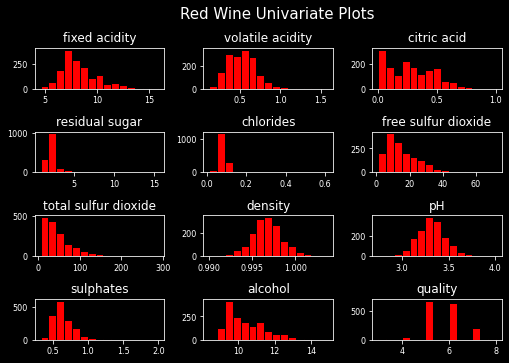

In [19]:
df_red.hist(bins =15, color = 'red', edgecolor = 'black', linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)

plt.tight_layout(rect=(0,0,1.2,1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

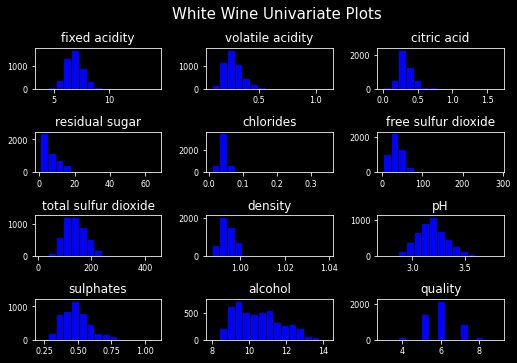

In [20]:
df_white.hist(bins =15, color = 'blue', edgecolor = 'black', linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)

plt.tight_layout(rect=(0,0,1.2,1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)